# FLIP ROBO TECHNOLOGIES

# NAME: BIJAY PAREEK

# BATCH: DS2308


# Projects Evaluation Phase 1:


# Avocado Project:



# Project Description:

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

## The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

# Some relevant columns in the dataset:
•	Date - The date of the observation
•	AveragePrice - the average price of a single avocado
•	type - conventional or organic
•	year - the year
•	Region - the city or region of the observation
•	Total Volume - Total number of avocados sold
•	4046 - Total number of avocados with PLU 4046 sold
•	4225 - Total number of avocados with PLU 4225 sold
•	4770 - Total number of avocados with PLU 4770 sold

# Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file. 

# Dataset Link-
•	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip


# import necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
import pickle

# Loading the dataset:

In [2]:
df = pd.read_csv(r"C:/Users/raj/Downloads/avocado (1).csv") ## here we will extract the dataset from the cvs file
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Now we will see the total rows and columns present in the dataset:

In [3]:
df.shape

(16468, 14)

# Now we are going to see the nan value present in the dataset:

In [4]:
df.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

## Note: we can see that nan present in the dataset:

# Dropping the null values in dataset:

In [5]:
df.dropna(subset=['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],inplace=True)

# Now we will see the dropna works with the nan present in dataset:

In [6]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# note there is no nan in the dataset now we can use the dataset for further analysis:

# now we will see the rows and columns present in the dataset:

In [7]:
print(df.shape)

(1517, 14)


In [8]:
print(df["region"].value_counts())

California             76
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Charlotte              31
Portland               30
Houston                29
NorthernNewEngland     29
WestTexNewMexico       27
Nashville              25
TotalUS                25
Denver                 24
SouthCarolina          24
Chicago                23
GrandRapids            23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
Syracuse               19
HarrisburgScranton     19
Midsouth               18
GreatLakes             18
DallasFtWorth          17
MiamiFtLauderdale      17
Roanoke     

# Now we will copy the dataset for classifications problem:

In [9]:
df.copy()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10.0,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,11.0,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,12.0,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,13.0,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


# EDA:

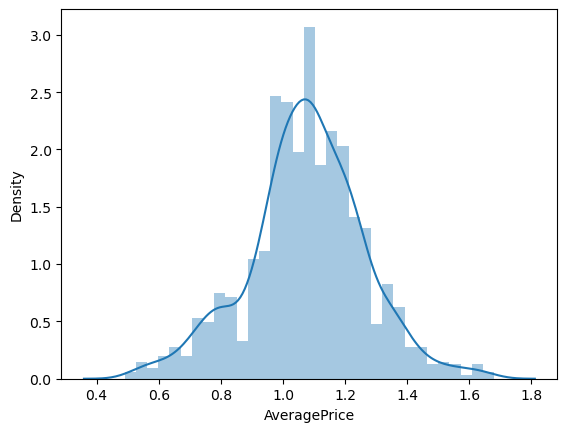

From the average price i can say that the  data is left skewed with skewnes


In [10]:
sns.distplot(df["AveragePrice"])
plt.show()

print("From the average price i can say that the  data is left skewed with skewnes")

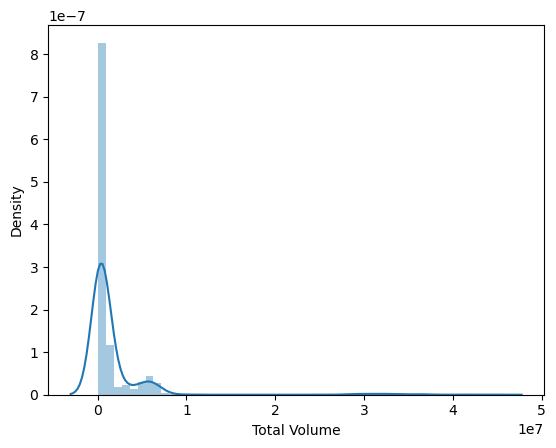

From the total volume i can say that the  data has very high skew


In [11]:
sns.distplot(df["Total Volume"])
plt.show()

print("From the total volume i can say that the  data has very high skew")

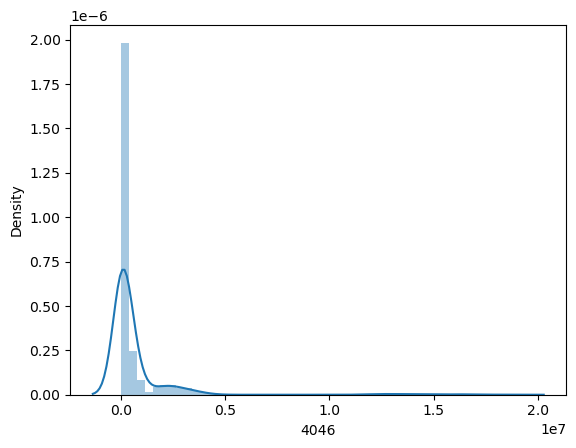

From the 4046 i can say that the skewness is present


In [12]:
sns.distplot(df["4046"])
plt.show()

print("From the 4046 i can say that the skewness is present")

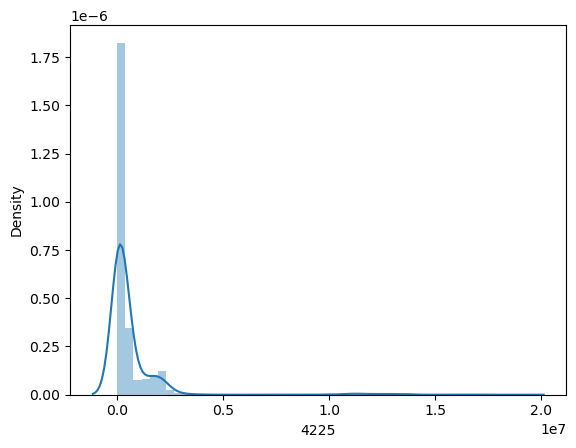

From the 4225 i can say that the skewness is present 


In [13]:
sns.distplot(df["4225"])
plt.show()

print("From the 4225 i can say that the skewness is present ")

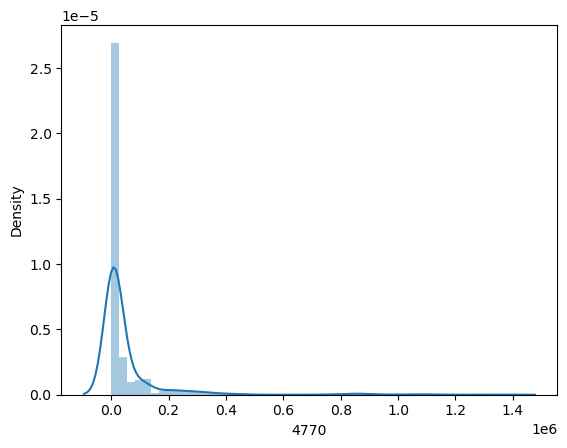

From the 4770 i can say that the skewness is present


In [14]:
sns.distplot(df["4770"])
plt.show()

print("From the 4770 i can say that the skewness is present")

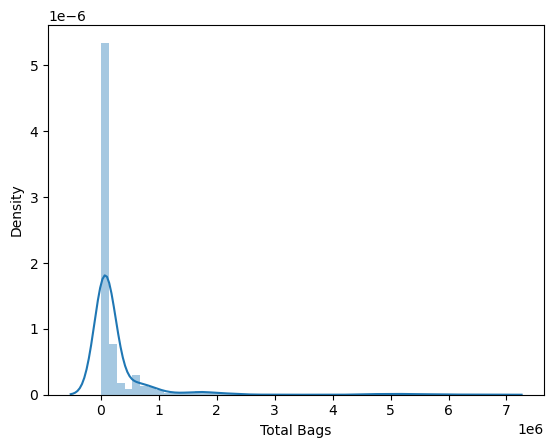

From the total bags i can say that the  data has high right skewness with peak values


In [15]:
sns.distplot(df["Total Bags"])
plt.show()

print("From the total bags i can say that the  data has high right skewness with peak values")

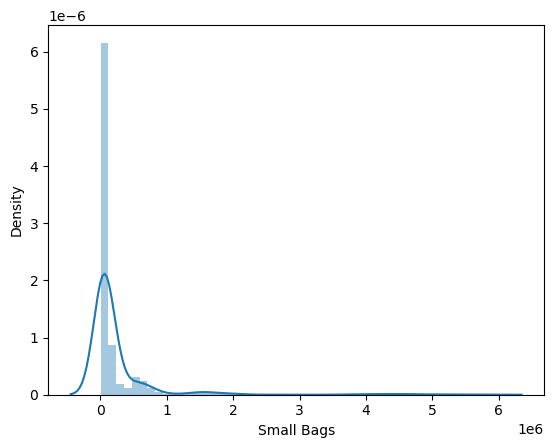

From the small bags i can say that the data is right skewed the median is very


In [16]:
sns.distplot(df["Small Bags"])
plt.show()

print("From the small bags i can say that the data is right skewed the median is very")

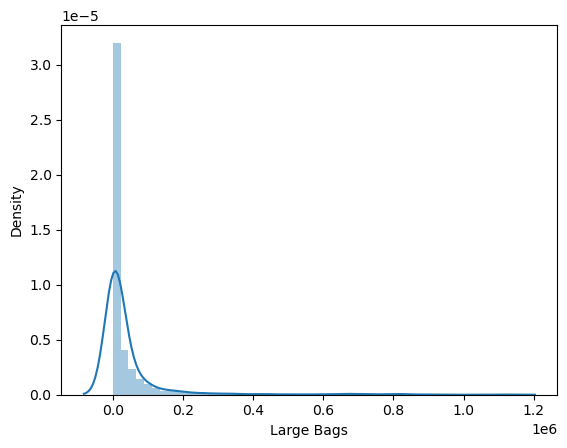

from the large bags i can say that the data has skewness(right)


In [17]:
sns.distplot(df["Large Bags"])
plt.show()

print("from the large bags i can say that the data has skewness(right)")

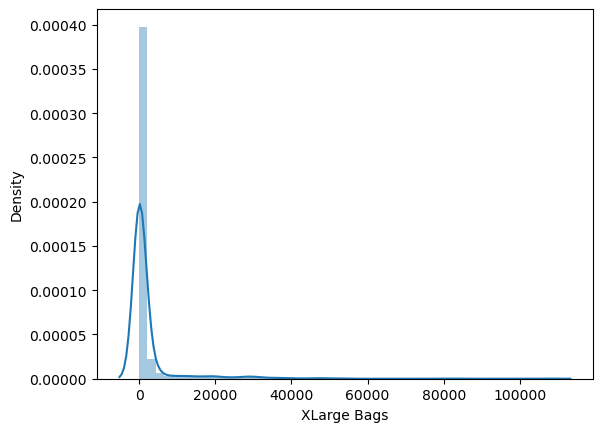

from the Xlarge bags i can say that the  data is right skewed


In [18]:
sns.distplot(df["XLarge Bags"])
plt.show()

print("from the Xlarge bags i can say that the  data is right skewed")

# Now we can see the relationship of the variables with each other using the pairplot:

<Figure size 1500x2000 with 0 Axes>

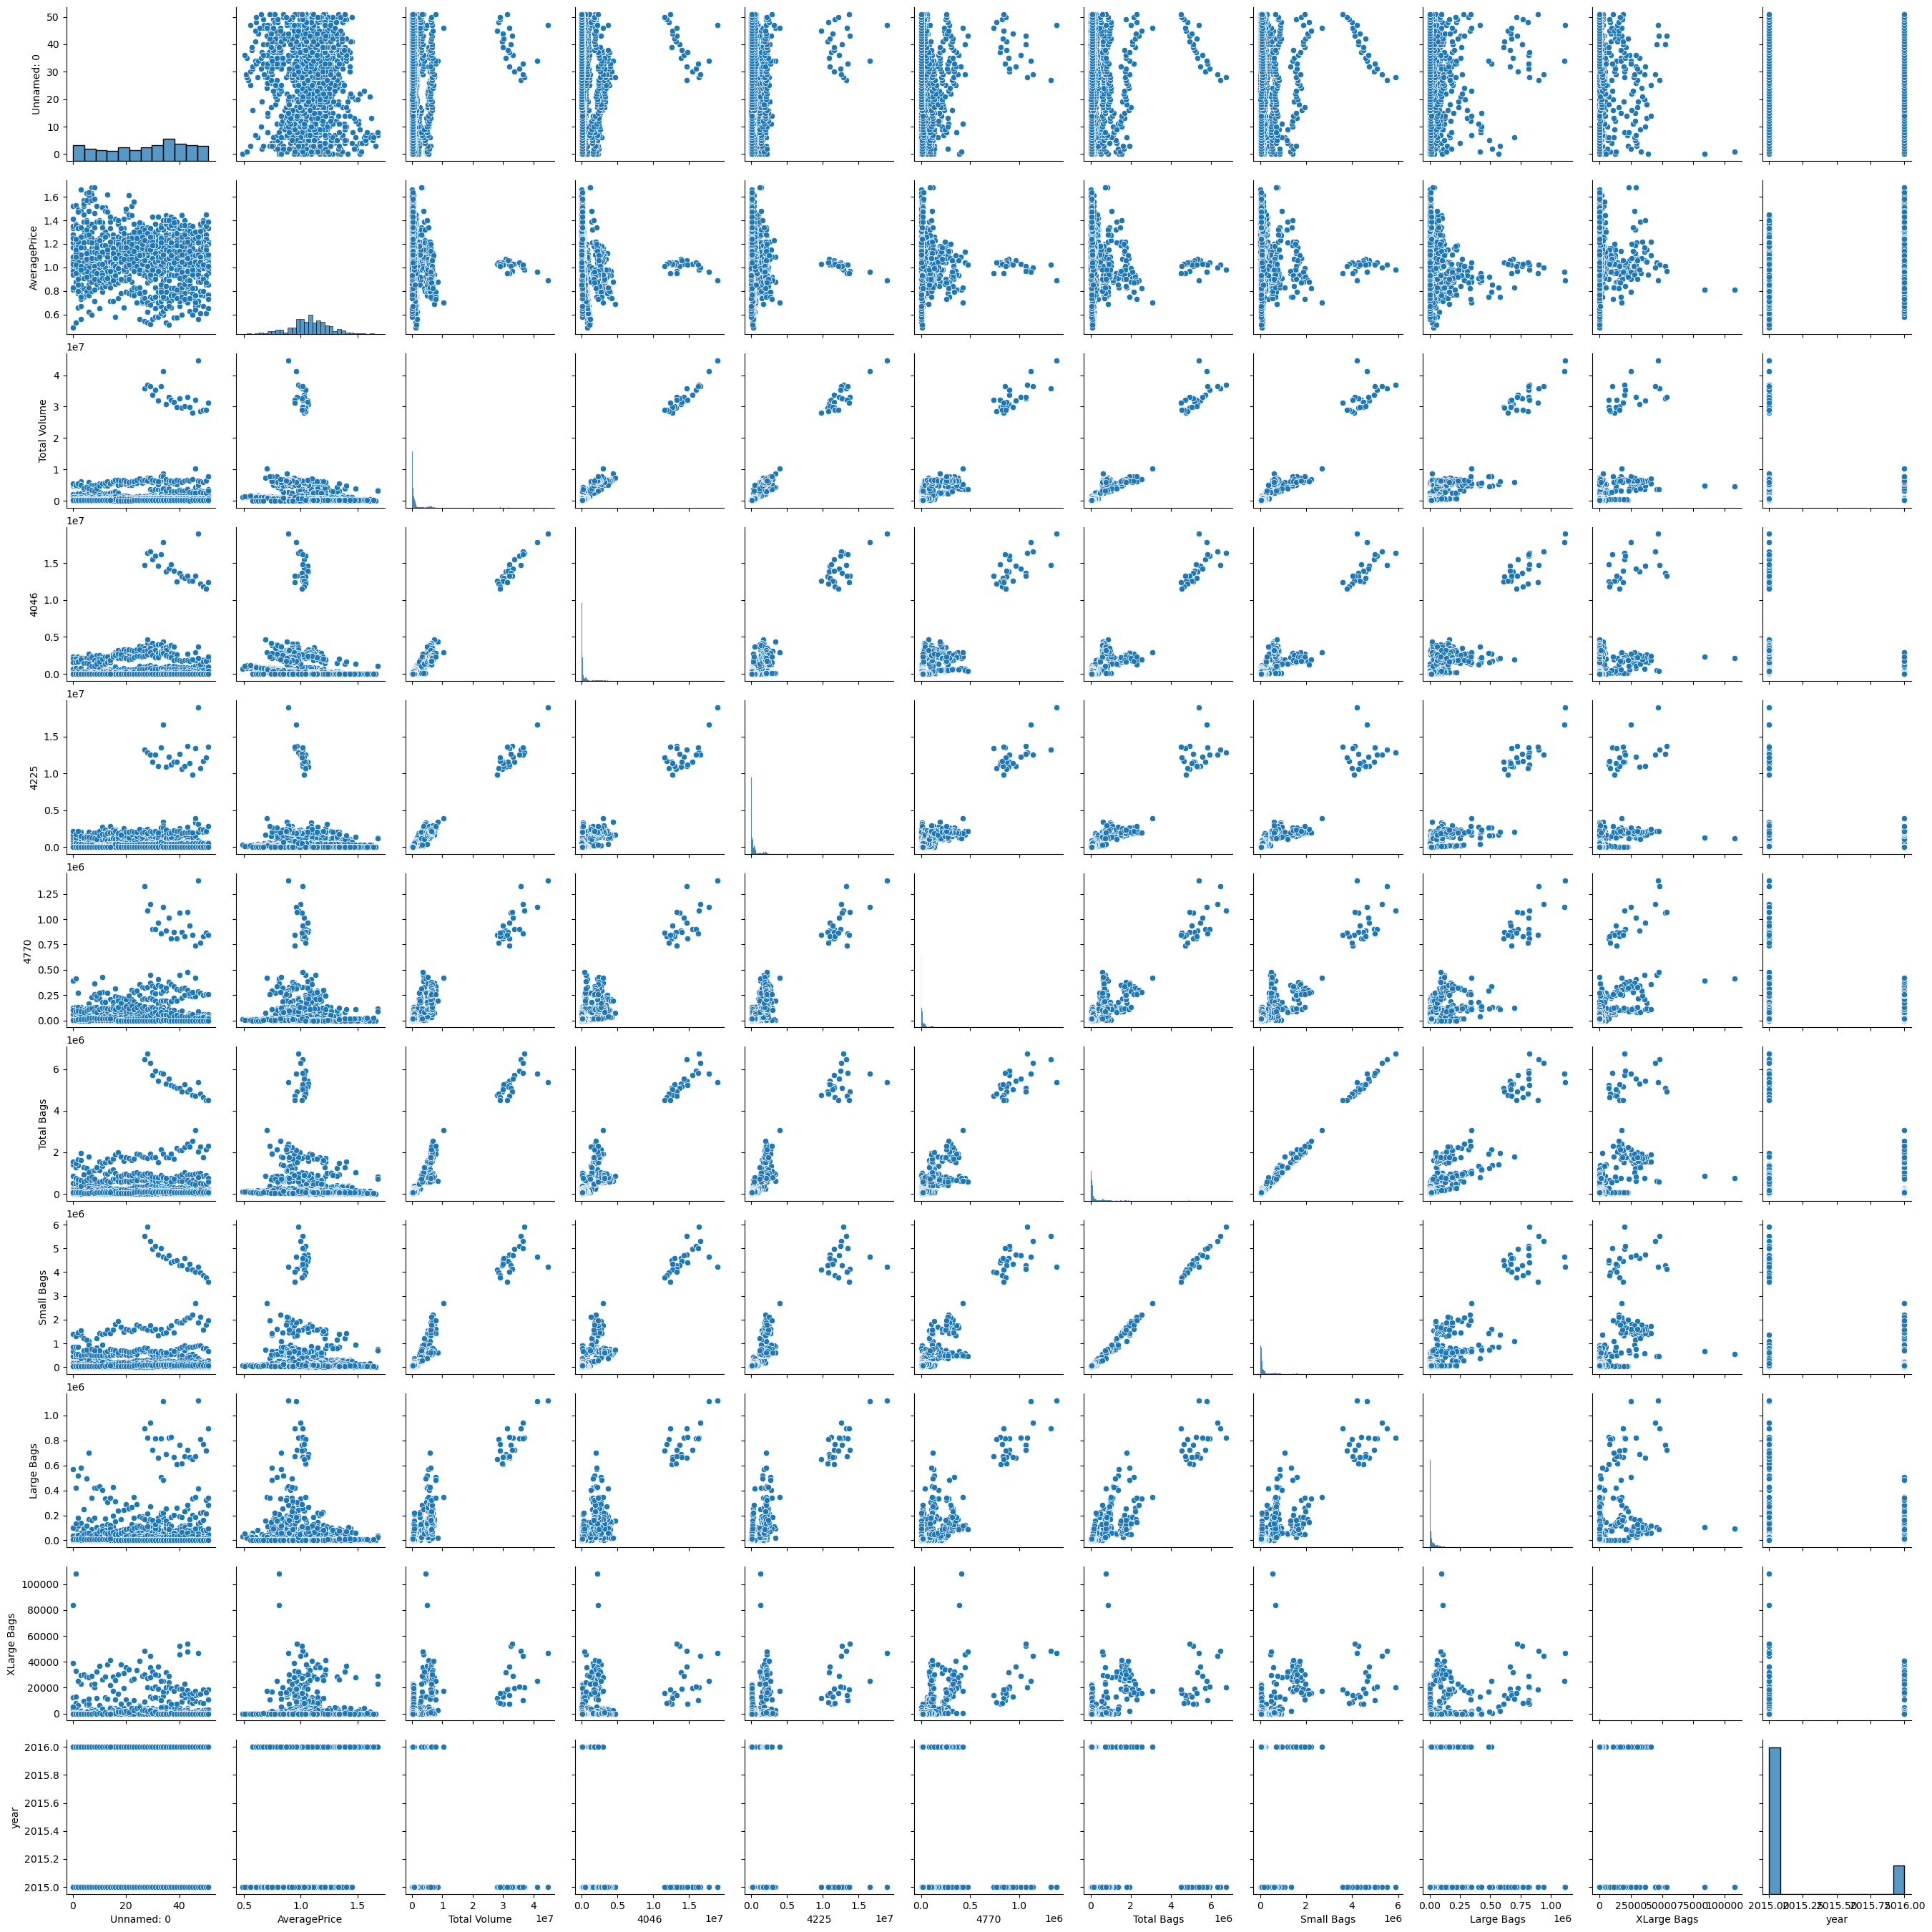

In [19]:
plt.figure(figsize=(15,20))
sns.pairplot(df)

# Now we will see the year columns from the dataset using the countplot:

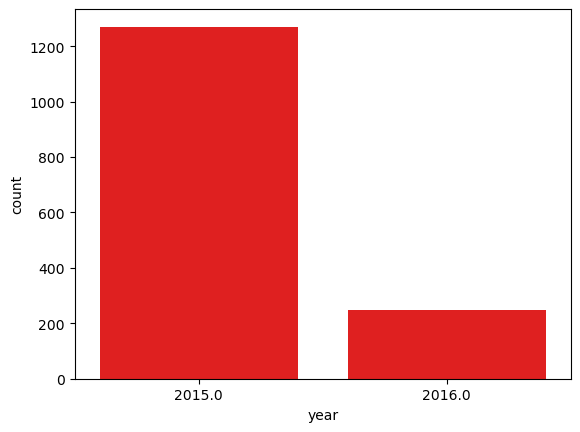

In [20]:
sns.countplot(df['year'],color='r')
plt.show()

# now will see the correlation among the dataset:

In [21]:
df.corr()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.075531,0.091934,0.092013,0.093566,0.075647,0.081007,0.083485,0.065364,-0.050993,-0.012854
AveragePrice,-0.075531,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683
Total Volume,0.091934,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189
4046,0.092013,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439
4225,0.093566,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254
4770,0.075647,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222
Total Bags,0.081007,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108
Small Bags,0.083485,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382
Large Bags,0.065364,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678
XLarge Bags,-0.050993,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342


# now we apply the heatmap and see the data realtions:

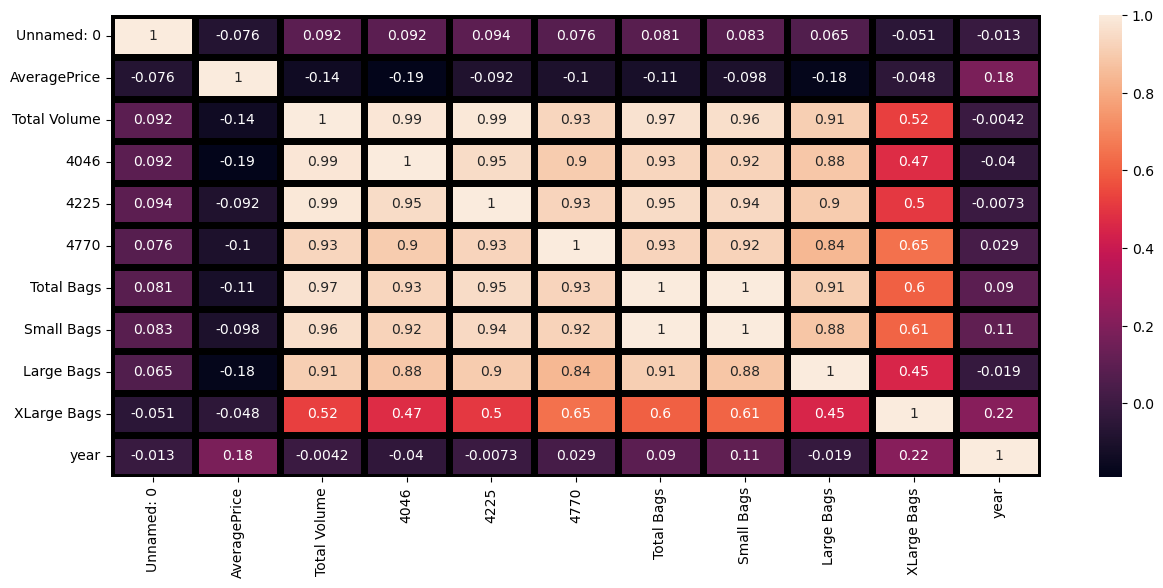

In [22]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True,linewidth=5,linecolor='black')
plt.show()


# From the heat mat observation i can say:

## Target variable=Average price

## All the variables have negative correlation with the target variable

## columns with least correlation with target are

## 1) unnamed:0 

## 2)"4225"

## 3) "small Bags"

## 4)"Large Bags"

In [23]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


## The standard deviation for "XLarge Bags" is the maximum (7455.712144)

## For all the other variables there is no much difference between the mean and median

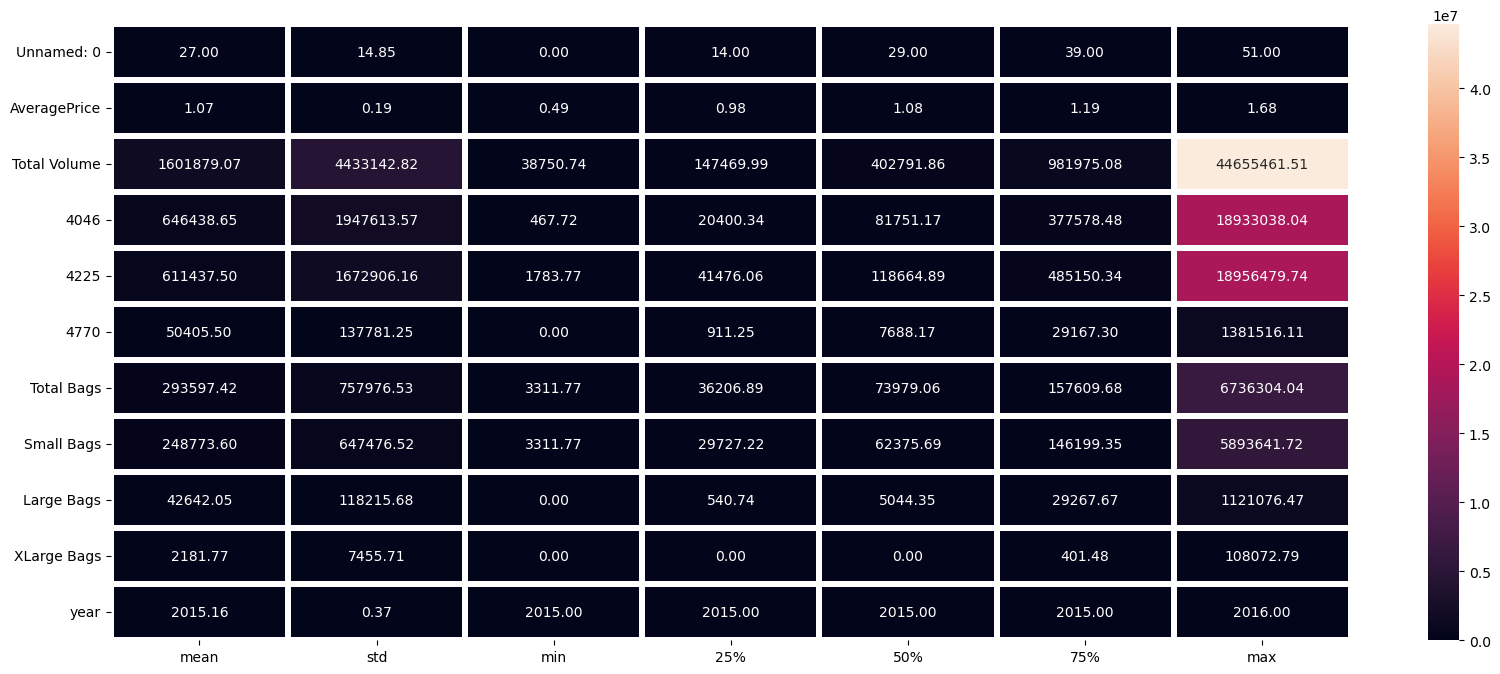

In [24]:
plt.figure(figsize=(20,8))
sns.heatmap(round(df.describe()[1:].transpose(),2),annot=True,fmt='.2f',linecolor='w',linewidth=3)
plt.show()

# Now we will the outliers present in the dataset using (boxplot)

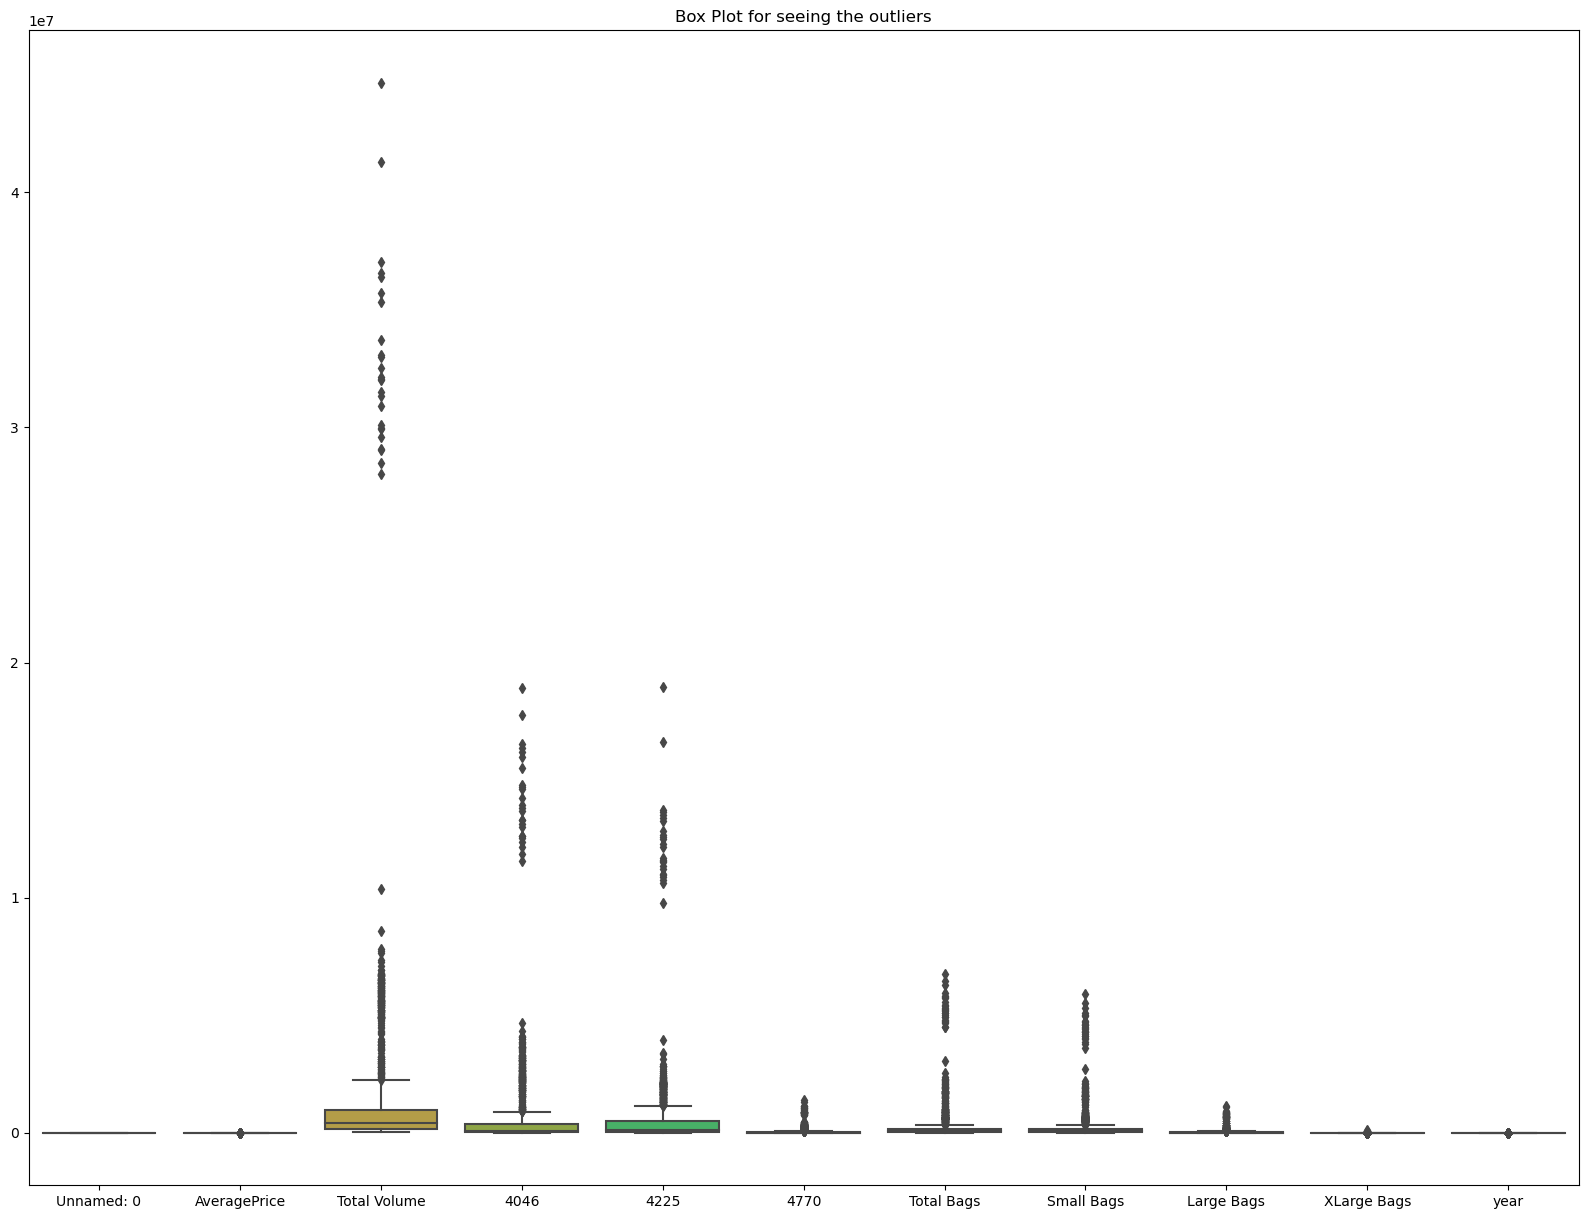

In [25]:
cols=['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags',
       'year']


plt.figure(figsize=(20, 15))
sns.boxplot(data=df[cols],orient='v')
plt.title('Box Plot for seeing the outliers')
plt.show()

## Note we can see the every feature has outliers and except the unnamed 0:

## As per data visualisation i can say that the columns [unnamed 0 , and date] has least corelation so i can drop the columns from the dataset:

In [26]:
df.drop(['Unnamed: 0',"Date"],axis=1,inplace=True)
df.sample()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
993,1.04,378845.21,223638.72,46631.18,17294.66,91280.65,80177.95,11102.7,0.0,conventional,2015.0,SouthCarolina


##  Note: As per the data set i can say "type","year" and "region" are in string formats so  we need to  encode them using the LabelEncoder

In [27]:
code = ["type", "year", "region"]

for col in code:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [28]:
df 
## encoded the categorical value:

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,0,1,7
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,0,1,7
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,0,1,7
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,0,1,7


In [29]:
z=np.abs(zscore(df))

print("Here is the Zscore result = ",z)



print("Here is the threshold result = ")
threshold=3
print(np.where(z>3))





df_new=df[(z<3).all(axis=1)]
print("original shape=",df.shape)
print("new shape=",df_new.shape)


Here is the Zscore result =        AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0         1.350481      0.346966  0.331490  0.333053  0.365608    0.375994   
1         1.456397      0.349078  0.331676  0.338923  0.365534    0.374927   
2         0.767838      0.334785  0.331614  0.300348  0.365010    0.376722   
3         0.026531      0.343636  0.331441  0.322576  0.365431    0.379802   
4         1.085691      0.349944  0.331539  0.339401  0.365408    0.379310   
...            ...           ...       ...       ...       ...         ...   
1512      1.668229      0.318397  0.302475  0.331910  0.238672    0.309055   
1513      2.303724      0.321242  0.309770  0.334407  0.224966    0.303931   
1514      2.144850      0.321203  0.308209  0.333987  0.244443    0.305099   
1515      2.091892      0.318784  0.304230  0.333568  0.238936    0.303098   
1516      1.880061      0.320172  0.309877  0.333209  0.245699    0.296272   

      Small Bags  Large Bags  XLar

## As the data loss will be 100% we cannot drop them and shall try other methods to overcome the effect of outliers

In [30]:
df.skew()


AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
type            0.000000
year            1.828332
region          0.288146
dtype: float64

##As compared to the acceptable skewness most of the features have very high skew

##columns with less skewness are:

1.AveragePrice

2.type

3.region

# assigning features(x) and label(Y):

In [31]:
X = df.drop(["AveragePrice"],axis=1)
y = df["AveragePrice"]

In [32]:
X

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,0,0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,0,0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,0,0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,0,0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1512,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,0,1,7
1513,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,0,1,7
1514,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,0,1,7
1515,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,0,1,7


In [33]:
y

0       1.33
1       1.35
2       0.93
3       1.08
4       1.28
        ... 
1512    1.39
1513    1.51
1514    1.48
1515    1.47
1516    1.43
Name: AveragePrice, Length: 1517, dtype: float64

# Now we will use the Standard scalling to feature(x):

In [34]:
sc = StandardScaler()      
X = sc.fit_transform(X)

In [35]:
## now we will using the scale data and keep into new dataframe(x)
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,10
0,-0.346966,-0.331490,-0.333053,-0.365608,-0.375994,-0.371055,-0.360044,-0.292727,0.0,-0.441008,-1.314338
1,-0.349078,-0.331676,-0.338923,-0.365534,-0.374927,-0.369812,-0.360008,-0.292727,0.0,-0.441008,-1.314338
2,-0.334785,-0.331614,-0.300348,-0.365010,-0.376722,-0.371922,-0.359960,-0.292727,0.0,-0.441008,-1.314338
3,-0.343636,-0.331441,-0.322576,-0.365431,-0.379802,-0.375576,-0.359701,-0.292727,0.0,-0.441008,-1.314338
4,-0.349944,-0.331539,-0.339401,-0.365408,-0.379310,-0.375098,-0.359160,-0.292727,0.0,-0.441008,-1.314338
...,...,...,...,...,...,...,...,...,...,...,...
1512,-0.318397,-0.302475,-0.331910,-0.238672,-0.309055,-0.308916,-0.273213,-0.260489,0.0,2.267532,-0.880286
1513,-0.321242,-0.309770,-0.334407,-0.224966,-0.303931,-0.299831,-0.288090,-0.292727,0.0,2.267532,-0.880286
1514,-0.321203,-0.308209,-0.333987,-0.244443,-0.305099,-0.301950,-0.290953,-0.182037,0.0,2.267532,-0.880286
1515,-0.318784,-0.304230,-0.333568,-0.238936,-0.303098,-0.298364,-0.290783,-0.292727,0.0,2.267532,-0.880286


# As we can see the sknewness in the x(feature) we can reduced using the power transform:

In [36]:
X = power_transform(X,method='yeo-johnson')
X

array([[-1.02703985, -0.88912901, -0.7675712 , ...,  0.        ,
        -0.44100815, -1.43647316],
       [-1.04926117, -0.89111903, -0.81718481, ...,  0.        ,
        -0.44100815, -1.43647316],
       [-0.90164535, -0.89045775, -0.50551001, ...,  0.        ,
        -0.44100815, -1.43647316],
       ...,
       [-0.76728367, -0.6495687 , -0.77540965, ...,  0.        ,
         2.26753179, -0.87893087],
       [-0.74394197, -0.61043561, -0.7718922 , ...,  0.        ,
         2.26753179, -0.87893087],
       [-0.75731755, -0.6661333 , -0.76888215, ...,  0.        ,
         2.26753179, -0.87893087]])

# Now we will use the train_test_split:

In [37]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=179)

# now we use different model and pass in the loop to see the result:

In [38]:
models=[LinearRegression(),
        DecisionTreeRegressor(),
        KNeighborsRegressor(),
        Lasso(),
        Ridge(),
        ElasticNet()]

for i in models:
    i.fit(x_train,y_train)
    pred_y=i.predict(x_test)
    print("Result",i,"model =")
    print(f"r2 score is",(r2_score(y_test,pred_y)*100))
    cross_score=cross_val_score(i,X,y,cv=3).mean()*100
    print("cross validation score is",cross_score)
    print('\n')
    

Result LinearRegression() model =
r2 score is 51.601037488967194
cross validation score is 26.16329143719762


Result DecisionTreeRegressor() model =
r2 score is 69.34419389993809
cross validation score is -92.95461015099687


Result KNeighborsRegressor() model =
r2 score is 84.06161794384208
cross validation score is 8.621236123365168


Result Lasso() model =
r2 score is -0.40570516572708826
cross validation score is -0.8796381756158933


Result Ridge() model =
r2 score is 51.4350113114459
cross validation score is 27.193333300583276


Result ElasticNet() model =
r2 score is -0.40570516572708826
cross validation score is -0.8796381756158933




##  note: after passing through different model i can say LinearRegression can be used for training

# [Linear Regressor]

In [39]:
Lr=LinearRegression()
Lr.fit(x_train,y_train)
y_pred=Lr.predict(x_test)

print("Here we use the linear regression....")

Here we use the linear regression....


In [40]:
print("Now we will see the result of the of linear regression.....")

print("The r2 score is =",r2_score(y_test,y_pred)*100)
cv=cross_val_score(Lr,X,y,cv=3).mean()*100
print("The cross validation score is = ",cv)
print("Result of mean absolute error is =",mean_absolute_error(y_test,y_pred))
print("Result of mean squared error is =",mean_squared_error(y_test,y_pred))
print("Result of root mean squared error is =",np.sqrt(mean_squared_error(y_test,y_pred)))

Now we will see the result of the of linear regression.....
The r2 score is = 51.601037488967194
The cross validation score is =  26.16329143719762
Result of mean absolute error is = 0.11181127889040665
Result of mean squared error is = 0.019125747964354883
Result of root mean squared error is = 0.1382958711037856


In [41]:
a=np.array(y_test)
a

array([0.9 , 1.  , 1.08, 1.18, 1.26, 1.21, 1.05, 1.37, 1.07, 0.89, 1.17,
       0.7 , 0.66, 0.99, 0.98, 0.98, 1.04, 0.89, 1.09, 1.16, 1.15, 0.71,
       0.71, 1.1 , 1.22, 1.08, 1.04, 1.09, 1.15, 1.05, 1.17, 0.76, 0.67,
       0.82, 1.35, 1.15, 1.29, 1.19, 0.9 , 1.05, 1.44, 1.05, 1.2 , 1.23,
       1.03, 1.17, 1.58, 1.01, 0.99, 1.24, 0.7 , 1.26, 1.19, 0.89, 1.43,
       1.12, 1.15, 1.02, 0.74, 1.21, 1.17, 0.81, 1.02, 1.2 , 1.17, 0.91,
       0.77, 0.74, 0.99, 1.07, 1.19, 1.11, 1.14, 0.7 , 1.32, 1.23, 1.04,
       1.03, 0.93, 1.17, 1.05, 1.01, 1.12, 1.22, 1.05, 1.  , 1.24, 1.04,
       0.98, 1.28, 0.99, 0.53, 1.03, 1.07, 1.07, 0.7 , 1.  , 1.41, 0.83,
       1.06, 1.01, 1.24, 1.07, 0.77, 1.25, 1.22, 1.1 , 1.08, 1.27, 0.98,
       0.79, 1.15, 1.01, 1.06, 0.99, 0.81, 0.76, 1.03, 0.72, 1.05, 0.96,
       0.93, 1.27, 1.3 , 0.77, 1.26, 0.83, 0.56, 1.16, 1.44, 0.56, 1.28,
       0.8 , 1.29, 1.14, 1.06, 1.4 , 0.88, 1.11, 1.  , 1.28, 1.42, 1.19,
       1.17, 1.25, 1.07, 0.89, 0.97, 1.23, 1.08, 1.

In [42]:
predicted=np.array(Lr.predict(x_test))
predicted

array([1.16828831, 1.11252067, 1.09404253, 1.19608308, 1.08483552,
       1.14749531, 1.08050781, 1.10578479, 1.15670461, 1.01450685,
       1.20181893, 0.81819118, 0.83691432, 1.15667904, 0.9387946 ,
       1.10031745, 1.24367188, 1.17004146, 1.07148442, 1.18520683,
       0.77811684, 0.76657683, 0.84838281, 1.11197138, 1.19401988,
       1.03170254, 0.97193838, 1.10219291, 1.19186545, 1.17099795,
       1.15065155, 0.95185329, 0.83803351, 1.02301368, 1.15914972,
       1.22337823, 1.21595967, 0.98496208, 1.20841272, 1.15953989,
       1.22865355, 1.19240838, 1.12490344, 1.20798534, 1.03332821,
       1.1562092 , 1.16128403, 0.94482265, 1.10872827, 1.09324601,
       0.87071437, 1.1208799 , 1.06844204, 0.91990859, 1.24909721,
       1.15694909, 1.17200647, 1.19614449, 0.93940584, 1.20585203,
       1.11449524, 0.91863227, 1.0869851 , 1.12472178, 1.2361561 ,
       0.99539421, 0.94174189, 1.17652687, 1.0651143 , 1.17198068,
       1.10078965, 1.20377294, 1.15320727, 0.87051899, 1.14649

## comparing the actual and predicted values and store in the dataframe:

In [43]:
df_model = pd.DataFrame({'original':a,'predicted':predicted})
df_model

,original,predicted
0,0.90,1.168288
1,1.00,1.112521
2,1.08,1.094043
3,1.18,1.196083
4,1.26,1.084836
...,...,...
375,1.19,1.108387
376,1.06,1.153381
377,0.88,0.961570
378,1.06,0.972174


In [44]:
filename='Avocado_model.pkl'
pickle.dump(Lr,open(filename,'wb'))

# [Data conclusion & its report]:

# Conclusion:

# Regression:
i have performed Regression on my target variable i.e "AveragePrice" and trained the model with using Linear regression

the evaluation of the model is as follows:

r2 score= 51.60103748896721

cross validation score is 26.172635577971537

mean absolute error= 0.11181127889040662

mean squared error= 0.01912574796435488

root mean squared error= 0.1382958711037856

# The actual and predicted values are  similar and we can say that the model is successfully trained and tested.

# Now the [Classification] is used for the same dataset:

In [45]:
print(" AS we can see  this is orginal dataset of Avocada project ")
df1 = pd.read_csv(r"C:/Users/raj/Downloads/avocado (1).csv") ## here we will extract the dataset from the cvs file
df1

 AS we can see  this is orginal dataset of Avocada project 


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
print("After analysis and data cleaning in the regression the same data i will use for classification")
df

After analysis and data cleaning in the regression the same data i will use for classification


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,0,1,7
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,0,1,7
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,0,1,7
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,0,1,7


In [47]:
print("now we will see nan = ",df.isnull().sum())
print("Rows and columns = ",df.shape)


now we will see nan =  AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64
Rows and columns =  (1517, 12)


# Note: Here the data is clean and we can use the data set:

# [set target and features for classification]

In [48]:
x1=df.drop(["region"],axis=1)
y1=df["region"]


In [49]:
x1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,0,1
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,0,1
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,0,1
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,0,1


In [50]:
y1

0       0
1       0
2       0
3       0
4       0
       ..
1512    7
1513    7
1514    7
1515    7
1516    7
Name: region, Length: 1517, dtype: int32

# now we will use the standard scaller:

In [51]:
sc=StandardScaler()
x1= sc.fit_transform(x1)

In [52]:
x1

array([[ 1.35048079, -0.34696593, -0.33149016, ..., -0.29272731,
         0.        , -0.44100815],
       [ 1.45639674, -0.34907791, -0.33167633, ..., -0.29272731,
         0.        , -0.44100815],
       [-0.76783831, -0.33478463, -0.33161448, ..., -0.29272731,
         0.        , -0.44100815],
       ...,
       [ 2.14485045, -0.32120275, -0.30820887, ..., -0.1820374 ,
         0.        ,  2.26753179],
       [ 2.09189247, -0.31878364, -0.30423037, ..., -0.29272731,
         0.        ,  2.26753179],
       [ 1.88006056, -0.3201721 , -0.30987728, ..., -0.29272731,
         0.        ,  2.26753179]])

# As we can see the sknewness in the x(feature) we can reduced using the power transform:

In [53]:
x1=power_transform(x1,method='yeo-johnson')

In [54]:
x1

array([[ 1.37091814, -1.02703985, -0.88912901, ..., -0.5726039 ,
         0.        , -0.44100815],
       [ 1.48256943, -1.04926117, -0.89111903, ..., -0.5726039 ,
         0.        , -0.44100815],
       [-0.77486746, -0.90164535, -0.89045775, ..., -0.5726039 ,
         0.        , -0.44100815],
       ...,
       [ 2.21480215, -0.76728367, -0.6495687 , ...,  0.60044579,
         0.        ,  2.26753179],
       [ 2.1581092 , -0.74394197, -0.61043561, ..., -0.5726039 ,
         0.        ,  2.26753179],
       [ 1.93192144, -0.75731755, -0.6661333 , ..., -0.5726039 ,
         0.        ,  2.26753179]])

# Data split:

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=30,random_state=2)

# Building different model and we will check the result:

In [56]:
models=[DecisionTreeClassifier(),
        KNeighborsClassifier(),
        SVC()]

for i in models:
    i.fit(x_train,y_train)
    pred_y=i.predict(x_test)
    print("result of ",i,"algorithm is = ")
    print(f" The accuracy score is =  {accuracy_score(y_test,pred_y)*100}")
    crossval=cross_val_score(i,x1,y1,cv=5).mean()*100
    print("The cross_validation score is =",crossval)
    print('\n')
    

result of  DecisionTreeClassifier() algorithm is = 
 The accuracy score is =  96.66666666666667
The cross_validation score is = 80.820305714782


result of  KNeighborsClassifier() algorithm is = 
 The accuracy score is =  93.33333333333333
The cross_validation score is = 83.78691158589542


result of  SVC() algorithm is = 
 The accuracy score is =  70.0
The cross_validation score is = 74.16688379364251




# As decision tree has good accuracy let use the hypertune and train our model with decisiontree classifier algorithm

In [57]:
dtc=DecisionTreeClassifier()

parameters={"criterion":["gini","entropy"],
            "splitter":['random','best'],
            "min_samples_leaf":[2,4,6,8]}


abc=GridSearchCV(dtc,parameters)
abc.fit(x_train,y_train)
print(abc.best_params_)

{'criterion': 'entropy', 'min_samples_leaf': 2, 'splitter': 'best'}


# using the best parameter obtained from the above now we will use it :

In [58]:
dtc=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=2,splitter='best')
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
score=accuracy_score(y_test,y_pred)*100
print("accuracy",score)
crossval=cross_val_score(dtc,x1,y1,cv=5).mean()*100
print("cross_validation score=",crossval)
print("\n")
print("confusion matrix \n",confusion_matrix(y_test,y_pred))
print("\n")
print("classification report\n",classification_report(y_test,y_pred))

accuracy 93.33333333333333
cross_validation score= 80.02692374500609


confusion matrix 
 [[3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 

In [59]:
actual=np.array(y_test)
actual

array([ 0, 49,  5, 17, 47, 46, 50,  5, 42,  5,  7,  1,  4,  8,  9, 26,  0,
        3, 10, 32,  0, 47, 42, 19, 26, 26, 12, 19,  2, 35])

In [60]:
predicted=np.array(y_pred)
predicted

array([ 0, 48,  5, 17, 47, 46, 50,  5, 42,  5,  7,  1,  4,  8,  9, 26,  0,
        3, 10, 22,  0, 47, 42, 19, 26, 26, 12, 19,  2, 35])

# [comparing the actual and predicted values]

In [61]:
df_comparing=pd.DataFrame({"actual values":actual,"predicted values":predicted})
df_comparing

,actual values,predicted values
0,0,0
1,49,48
2,5,5
3,17,17
4,47,47
5,46,46
6,50,50
7,5,5
8,42,42
9,5,5


In [62]:
filename='Avocado_model.pkl'
pickle.dump(Lr,open(filename,'wb'))

# [Data conclusion & its report]:

# Conclusion

# classification

Thus i have performed classification on my target variable i.e "region" and trained the model using decision tree classifier

The evaluation of the model is as follows:

accuracy score= 93.33333333333333

cross_validation score= 80.02692374500609

The actual and predicted values are thus similar and we can say that the model is successfully trained and tested.

 

In [63]:
################################################ thank you#####################################################################